<a href="https://colab.research.google.com/github/kraseliukts/DataAnalysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS

**Objective:** Analyze pricing data to understand the impact of price changes on key business metrics such as ride requests, driver acceptance rates, ride fulfillment, and profitability. Your goal is to provide actionable insights and recommend pricing strategies that improve business performance.

## Data

In [79]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [80]:
# read ans visualize the data file (first 10 raws)
url="https://github.com/kraseliukts/DataAnalysis/raw/main/SnappBox.xlsx"
data=pd.read_excel(url, engine='openpyxl')
data.head(5)

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order%,Fullfillment Rate%,Average Ride Fare
0,A,1.0,2022-06-22,0-1,763,737,611,507,53485000,0.965924,0.829037,0.664482,105493.0966
1,A,1.0,2022-06-22,1-2,1358,1330,1090,933,100400000,0.979381,0.819549,0.687040,107609.8607
2,A,1.0,2022-06-22,2-3,1094,1062,883,779,102060000,0.970750,0.831450,0.712066,131014.1207
3,A,1.0,2022-06-22,3-4,938,916,737,628,89610000,0.976546,0.804585,0.669510,142691.0828
4,A,1.0,2022-06-22,4-5,1060,1036,713,609,95235000,0.977358,0.688224,0.574528,156379.3103


In [81]:
data.tail(5)

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order%,Fullfillment Rate%,Average Ride Fare
30,A,1.0,2022-06-22,32-33,3,3,2,2,1255000,1.000000,0.666667,0.666667,627500.000
31,A,1.0,2022-06-22,33-34,4,4,4,1,565000,1.000000,1.000000,0.250000,565000.000
32,A,1.0,2022-06-22,34-35,3,3,2,1,445000,1.000000,0.666667,0.333333,445000.000
33,A,1.0,2022-06-22,>=35,6,6,5,2,945000,1.000000,0.833333,0.333333,472500.000
34,Grand Total,NaN,NaT,NaN,14307,13816,9192,7613,1301710000,0.965681,0.665316,0.532117,170985.157


In [82]:
#review the data information and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   City                              35 non-null     object        
 1   Service Type                      34 non-null     float64       
 2   Created Date                      34 non-null     datetime64[ns]
 3   Distance Buckets(KM)              34 non-null     object        
 4   Request                           35 non-null     int64         
 5   Offered Requests                  35 non-null     int64         
 6   Accepted Requests                 35 non-null     int64         
 7   Ride                              35 non-null     int64         
 8   Total Ride Fare(GMV)(IRR)         35 non-null     int64         
 9    Offered-Order / Created-Order %  35 non-null     float64       
 10  Accepted-Order / Offered-Order%   35 non-null     fl

### Missing values

In [83]:
# verify if there are missing values
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0%
Service Type - 3%
Created Date - 3%
Distance Buckets(KM) - 3%
Request - 0%
Offered Requests - 0%
Accepted Requests - 0%
Ride - 0%
Total Ride Fare(GMV)(IRR) - 0%
 Offered-Order / Created-Order % - 0%
Accepted-Order / Offered-Order% - 0%
Fullfillment Rate% - 0%
Average Ride Fare - 0%


In [84]:
data.isnull().sum()

,0
City,0
Service Type,1
Created Date,1
Distance Buckets(KM),1
Request,0
Offered Requests,0
Accepted Requests,0
Ride,0
Total Ride Fare(GMV)(IRR),0
Offered-Order / Created-Order %,0


In [85]:
#Count how much there are missing values per row and visualize only the raws with missing values
missing_values=data.isnull().sum(axis=1)
raw_na = data[missing_values > 1]
raw_na

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order%,Fullfillment Rate%,Average Ride Fare
34,Grand Total,NaN,NaT,NaN,14307,13816,9192,7613,1301710000,0.965681,0.665316,0.532117,170985.157


In [86]:
# the raw with index #34 willbe deleted, as it shows the total values
data=data.drop(34)
data.tail()

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order%,Fullfillment Rate%,Average Ride Fare
29,A,1.0,2022-06-22,31-32,2,2,2,1,300000,1.0,1.000000,0.500000,300000.0
30,A,1.0,2022-06-22,32-33,3,3,2,2,1255000,1.0,0.666667,0.666667,627500.0
31,A,1.0,2022-06-22,33-34,4,4,4,1,565000,1.0,1.000000,0.250000,565000.0
32,A,1.0,2022-06-22,34-35,3,3,2,1,445000,1.0,0.666667,0.333333,445000.0
33,A,1.0,2022-06-22,>=35,6,6,5,2,945000,1.0,0.833333,0.333333,472500.0


In [87]:
# verify if there are missing values
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0%
Service Type - 0%
Created Date - 0%
Distance Buckets(KM) - 0%
Request - 0%
Offered Requests - 0%
Accepted Requests - 0%
Ride - 0%
Total Ride Fare(GMV)(IRR) - 0%
 Offered-Order / Created-Order % - 0%
Accepted-Order / Offered-Order% - 0%
Fullfillment Rate% - 0%
Average Ride Fare - 0%


### Duplicated values

In [88]:
#verify if there are duplicated values. There are no duplicated values.
data_dup = data.drop_duplicates()
print(data_dup.shape)
print(data.shape)

(34, 13)
(34, 13)


### Data consistency

In [89]:
#convert the date type of the column "Service type" to Int
#convert the date tyre of the column "City" to String
#convert the date tyre of the column "Total Ride Fare(GMV)(IRR)" to Float with 2 decimales
data["Service Type"]=data["Service Type"].astype(int)
data["City"]=data["City"].astype("string")
data["Total Ride Fare(GMV)(IRR)"]=data["Total Ride Fare(GMV)(IRR)"].astype(float)

In [91]:
#round values to 2 decimals
columns_round=["Average Ride Fare","Total Ride Fare(GMV)(IRR)" ]
data[columns_round].round(2).head(2)

,Average Ride Fare,Total Ride Fare(GMV)(IRR)
0,105493.10,53485000.0
1,107609.86,100400000.0


In [92]:
#create new columns Year, Month, Day, Week
data['Created Date'] = pd.to_datetime(data['Created Date']).dt.date
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%Y/%m/%d')

In [93]:
data["Year"]=data['Created Date'].dt.year
data["Month"]=data['Created Date'].dt.month
data["Day"]=data['Created Date'].dt.day
data["Week"]=data['Created Date'].dt.strftime("%w")
data["Week"]=data['Created Date'].dt.strftime("%w").astype(int)

Text(0.5, 0, 'Fullfillment Rate%')

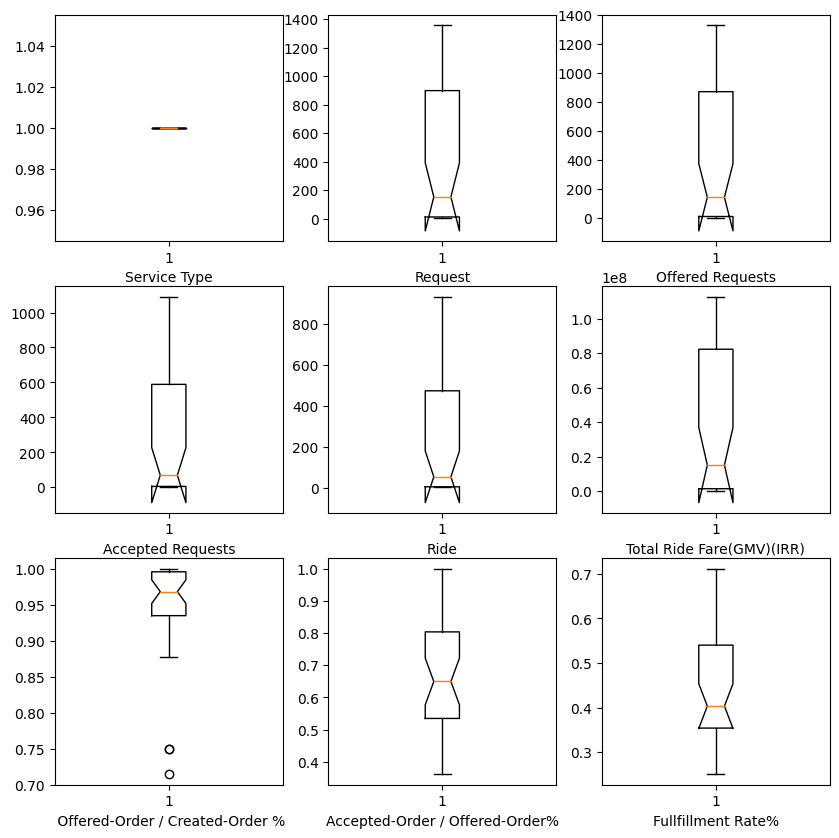

In [94]:
# create the box plot to review the data consistency
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes[0,0].boxplot(x="Service Type", data=data, notch = True)
axes[0,0].set_xlabel('Service Type')

axes[0,1].boxplot(x="Request", data=data, notch = True)
axes[0,1].set_xlabel('Request')

axes[0,2].boxplot(x="Offered Requests", data=data, notch = True)
axes[0,2].set_xlabel('Offered Requests')

axes[1,0].boxplot(x="Accepted Requests", data=data, notch = True)
axes[1,0].set_xlabel('Accepted Requests')

axes[1,1].boxplot(x="Ride", data=data, notch = True)
axes[1,1].set_xlabel('Ride')

axes[1,2].boxplot(x="Total Ride Fare(GMV)(IRR)", data=data, notch = True)
axes[1,2].set_xlabel('Total Ride Fare(GMV)(IRR)')

axes[2,0].boxplot(x=" Offered-Order / Created-Order %", data=data, notch = True)
axes[2,0].set_xlabel(' Offered-Order / Created-Order %')

axes[2,1].boxplot(x="Accepted-Order / Offered-Order%", data=data, notch = True)
axes[2,1].set_xlabel('Accepted-Order / Offered-Order%')

axes[2,2].boxplot(x="Fullfillment Rate%", data=data, notch = True)
axes[2,2].set_xlabel('Fullfillment Rate%')

### Creation of some new columns

In [95]:
data['fulfillment_rate']=data['Ride'] / data['Request'] * 100
data['fulfillment_rate']=data['fulfillment_rate'].round(2)

In [96]:
data['acceptance_rate']=data['Accepted Requests'] / data['Offered Requests'] * 100
data['acceptance_rate']=data['acceptance_rate'].round(2)

In [97]:
data['Distance Buckets(KM)']=data['Distance Buckets(KM)'].str.replace(r">=", "", regex=True)

In [114]:
data[['1st', '2nd']]=data['Distance Buckets(KM)'].str.split(r'[-]', expand=True)
data['1st']=data['1st'].astype(float)
data['2nd']=data['2nd'].astype(float)

### Final dataset

In [118]:
data.head()

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,...,Fullfillment Rate%,Average Ride Fare,Year,Month,Day,Week,fulfillment_rate,acceptance_rate,1st,2nd
0,A,1,2022-06-22,0-1,763,737,611,507,53485000.0,0.965924,...,0.664482,105493.0966,2022,6,22,3,66.45,82.90,0.0,1.0
1,A,1,2022-06-22,1-2,1358,1330,1090,933,100400000.0,0.979381,...,0.687040,107609.8607,2022,6,22,3,68.70,81.95,1.0,2.0
2,A,1,2022-06-22,2-3,1094,1062,883,779,102060000.0,0.970750,...,0.712066,131014.1207,2022,6,22,3,71.21,83.15,2.0,3.0
3,A,1,2022-06-22,3-4,938,916,737,628,89610000.0,0.976546,...,0.669510,142691.0828,2022,6,22,3,66.95,80.46,3.0,4.0
4,A,1,2022-06-22,4-5,1060,1036,713,609,95235000.0,0.977358,...,0.574528,156379.3103,2022,6,22,3,57.45,68.82,4.0,5.0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   City                              34 non-null     string        
 1   Service Type                      34 non-null     int64         
 2   Created Date                      34 non-null     datetime64[ns]
 3   Distance Buckets(KM)              34 non-null     object        
 4   Request                           34 non-null     int64         
 5   Offered Requests                  34 non-null     int64         
 6   Accepted Requests                 34 non-null     int64         
 7   Ride                              34 non-null     int64         
 8   Total Ride Fare(GMV)(IRR)         34 non-null     float64       
 9    Offered-Order / Created-Order %  34 non-null     float64       
 10  Accepted-Order / Offered-Order%   34 non-null     fl

## EDA (Exploratory Data Analysis).

In [119]:
pip install ydata-profiling

In [120]:
from ydata_profiling import ProfileReport

### Profile report

In [ ]:
profile=ProfileReport(data, title='Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]